In [ ]:
# ===============================================================
# 📘 "Oltre il prompt: guida pratica all’intelligenza artificiale 
#     per studenti e programmatori"
# © 2025 Francesco Di Gruttola
#
# Licensed under the Creative Commons 
# Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
# 👉 https://creativecommons.org/licenses/by-nc-nd/4.0/
#
# Repository: https://github.com/CereBEST/Workshop-AI-Modena-2025.git
# ===============================================================


# Il Machine Learning "Classico" (Parte 2)

## Introduzione

* Si intendono tutti quei modelli di "Shallow Learning" utilizzati per risolvere sia problemi di regressione che di classificazione, supervisionati o non supervisionati, che sono stati creati prima dell'avvento del Deep Learning.
* Essendo algoritmi "Shallow", rispetto al Deep Learning hanno minori capacità computazionali nel trovare dei pattern e delle regolarità nei dati quando ci troviamo di fronte a milioni o miliardi di esempi e migliaia di features.
* Tali modelli sono utilizzati moltissimo anche oggi e hanno bisogno di un numero molto più limitato di esempi per essere addestrati rispetto al Deep Learning - non c'è un numero preciso, ma è possibile provare a usarli dalle 50 unità in poi, fino a dataset con migliaia di esempi.
* Inoltre questi algoritmi non hanno la capacità di effettuare una "feature selection" automatica come nel Deep Learning. È quindi molto rilevante l'abilità del Data Scientist di selezionare le feature più importanti da utilizzare nel modello per effettuare la predizione.
* La principale libreria in Python per allenare e utilizzare modelli di Machine Learning è Scikit Learn.

## Preparo il dataset che utilizzerò per gli esempi (MNIST)

In [ ]:
# Importo le librerie necessarie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importo il CSV del dataset con Pandas

df_mnist = pd.read_csv("sample_data/mnist_train_small.csv", header=None)
df_mnist.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# ricavo informazioni sul dataset
print(df_mnist.info())
print(df_mnist.describe())
print(df_mnist.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 119.8 MB
None
                0        1        2        3        4        5        6    \
count  20000.000000  20000.0  20000.0  20000.0  20000.0  20000.0  20000.0   
mean       4.470200      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.892755      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           7        8        9    ...           775           776  \
count  20000.0  20000.0  20000.0  ...  20000.000000  20000.000000   
mean       0.0

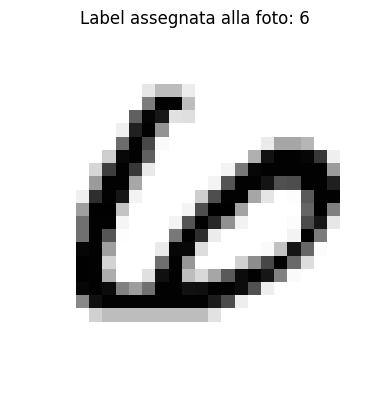

In [ ]:
# trasformo il dataset in un numpy array
np_mnist = df_mnist.values

# visualizziamo alcuni dati per capire cosa rappresentano
numero_esempio = 0
first_ex_res = np_mnist[numero_esempio, 1:].reshape(28, 28)
plt.figure()
plt.title("Label assegnata alla foto: " + str(np_mnist[numero_esempio, 0]))
plt.imshow(first_ex_res, cmap="binary")
plt.axis("off")
plt.show()

In [ ]:
first_ex_res.shape

(28, 28)

In [ ]:
# separo le feature dalla variabile target

X = df_mnist.drop(columns=[0])
y = df_mnist.iloc[:, 0]

# divido il dataset in train e test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# normalizzo i le feature di train e test
# importo la libreria utilizzata
from sklearn.preprocessing import MinMaxScaler

# instanzio l'oggetto scaler
scaler = MinMaxScaler().fit(X_train)

# scalo i dati di train e test
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

# controllo la shape di tutti i "pezzetti" di dataset
print(f"X_train.shape: {X_train_sc.shape}, X_test.shape: {X_test_sc.shape}, y_train.shape: {y_train.shape}, y_test.shape: {y_test.shape}")

X_train.shape: (16000, 784), X_test.shape: (4000, 784), y_train.shape: (16000,), y_test.shape: (4000,)


## Principali Algoritmi di Machine Learning Supervisionati

### k-Nearest Neighbors

* Può essere utilizzato sia per problemi di classificazione che di regressione.
* È uno dei modelli più "semplici" per il modo in cui prende le decisioni. Si tratta di una tipologia di modello che ha bisogno dei dati di training per effettuare la sua previsione (istance-based).
* Per prevedere una nuova istanza, va a osservare le previsioni delle "k" istanze più simili che ha a disposizione nel dataset di training.
* Ha un parametro fondamentale, chiamato k, che non è altro che il numero di “vicini” da osservare per effettuare la previsione della nuova istanza.
* Qualora il parametro k fosse impostato a 3, si andrebbero a prendere nel dataset di training le classificazioni delle istanze più vicine alla nuova istanza da classificare. La nuova istanza prenderebbe l'etichetta più popolare dei 3 "vicini" presi in considerazione. In caso di regressione, la previsione della nuova istanza sarebbe la media della variabile target dei suoi 3 "vicini".
* È un modello non lineare.

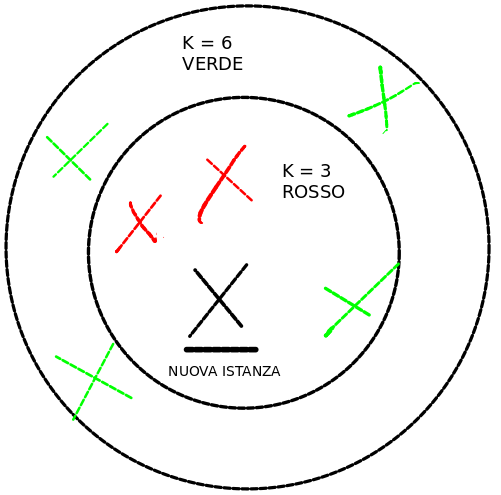

#### Esempio di codice

In [ ]:
# Importo il modello
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# istanzio e alleno il modello
knn_class = KNeighborsClassifier().fit(X_train_sc, y_train)

# faccio la mia previsione
y_pred_knn = knn_class.predict(X_train_sc)

print(f"Cross Validation Score: {np.mean(cross_val_score(knn_class, X_train_sc, y_train, cv=5))}")

Cross Validation Score: 0.9539375


### Regressione Lineare e Regressione Logistica

* La regressione mira a cercare delle relazioni tra le features e la variabile target. Questa relazione viene cercata attraverso un processo iterativo imparando volta per volta dagli errori sulle previsioni.
* La Regressione lineare risolve problemi di regressione. Il modello cerca la linea migliore che si adatta ai nostri dati.
* La Regressione logistica, senza farsi confondere dal nome, invece viene usata per problemi di classificazione. Anche in questo caso viene risolta un'equazione, ma utilizzata una funzione sigmoide per fornire la probabilità dell'input di appartenere ad una classe piuttosto che un'altra.
* I parametri più rilevati sono l'Alpha per la Regressione Lineare e il C per la Regressione Logistica. Questi termini servono per regolarizzare (penalizzare) l'errore commesso dal modello in fase di allenamento. Un valore ottimale di tali parametri dovrebbe trovare un equilibrio accettabile tra overfitting e underfitting, quindi tra l'apprendimento sui dati di allenamento e generalizzazione sui nuovi dati.
* Questi modelli, oltre alla previsione, possono darci indicazioni sulle feature più rilevanti per predire la variabile target. Nello specifico, ci danno un coefficiente sull'importanza di ogni feature (feature importance).
* Entrambi gli algoritmi sono modelli lineari.

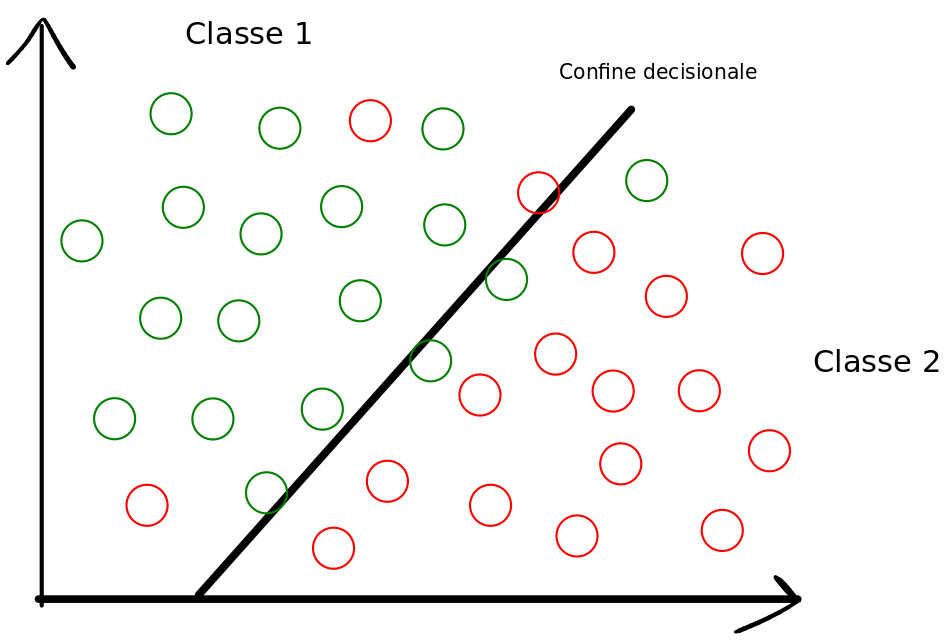

In [ ]:
# Importo il modello
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# istanzio e alleno il modello
lr_class = LogisticRegression(max_iter=200).fit(X_train_sc, y_train)

# faccio la mia previsione
y_pred_lr = lr_class.predict(X_train_sc)

print(f"Cross Validation Score: {np.mean(cross_val_score(lr_class, X_train_sc, y_train, cv=5))}")

Cross Validation Score: 0.9030000000000001


In [ ]:
# ottengo la feature importance tramite il coefficiente
lr_feat_imp = lr_class.coef_

# ordino in ordine ascendente le feature più importanti ottenendo il loro indice nell'array
lr_fi_sort = np.argsort(lr_feat_imp)
# print(lr_feat_imp.shape)
# print(lr_fi_sort)

# prendiamo il numero 0 come esempio
print(f"Il pixel che impatta negativamente sulla classificazione del numero 0 è il {lr_fi_sort[0, 0]} con i coefficiente di {lr_feat_imp[0, lr_fi_sort[0, 0]]}")
print(f"Il pixel che impatta positivamente sulla classificazione del numero 0 è il {lr_fi_sort[0, -1]} con i coefficiente di {lr_feat_imp[0, lr_fi_sort[0, -1]]}")

Il pixel che impatta negativamente sulla classificazione del numero 0 è il 461 con i coefficiente di -1.4458509979981864
Il pixel che impatta positivamente sulla classificazione del numero 0 è il 430 con i coefficiente di 1.080381573874893


### Decision Tree

* È un enorme passo avanti rispetto all'AI simbolica, dove operatori esperti davano le regole manualmente all'algoritmo. Questo modello dopo il training trova automaticamente nelle feature le regole logiche ottimali per predire la variabile target.
* Dopo la fase di training non ha più bisogno del dataset per prendere una decisione (model-based)
* Il modello individua le feature più e meno rilevanti per predire la variabile target. A seconda dei valori che assume ogni feature, partendo dalla più rilevante e arrivando progressivamente a quella meno rilevante, prende via via le sue decisioni di classificazione e regressione, diramandosi come un albero.
* Si tratta quindi di un trasparente, che, come la regressione lineare e logistica, ci consente di sapere in percentuale l'importanza di ogni feature nel predire la variabile target.
* È un modello non lineare.

In [ ]:
# Importo il modello
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# istanzio e alleno il modello
dt_class = DecisionTreeClassifier().fit(X_train_sc, y_train)

# faccio la mia previsione
y_pred_dt = dt_class.predict(X_train_sc)

print(f"Cross Validation Score: {np.mean(cross_val_score(dt_class, X_train_sc, y_train, cv=5))}")

Cross Validation Score: 0.8130000000000001


In [ ]:
# controllo l'importanza di ogni pixel in % nel predire la variabile target
dt_feat_imp = dt_class.feature_importances_

# ordino in ordine ascendente le feature più importanti ottenendo il loro indice nell'array
df_feat_imp_sort = np.argsort(dt_feat_imp)

print(f"Il pixel più rilevante per predire la variabile target è il {df_feat_imp_sort[-1]} con una rilevanza del {round(dt_feat_imp[df_feat_imp_sort[-1]] * 100, 2)}%")

Il pixel più rilevante per predire la variabile target è il 434 con una rilevanza del 5.74%


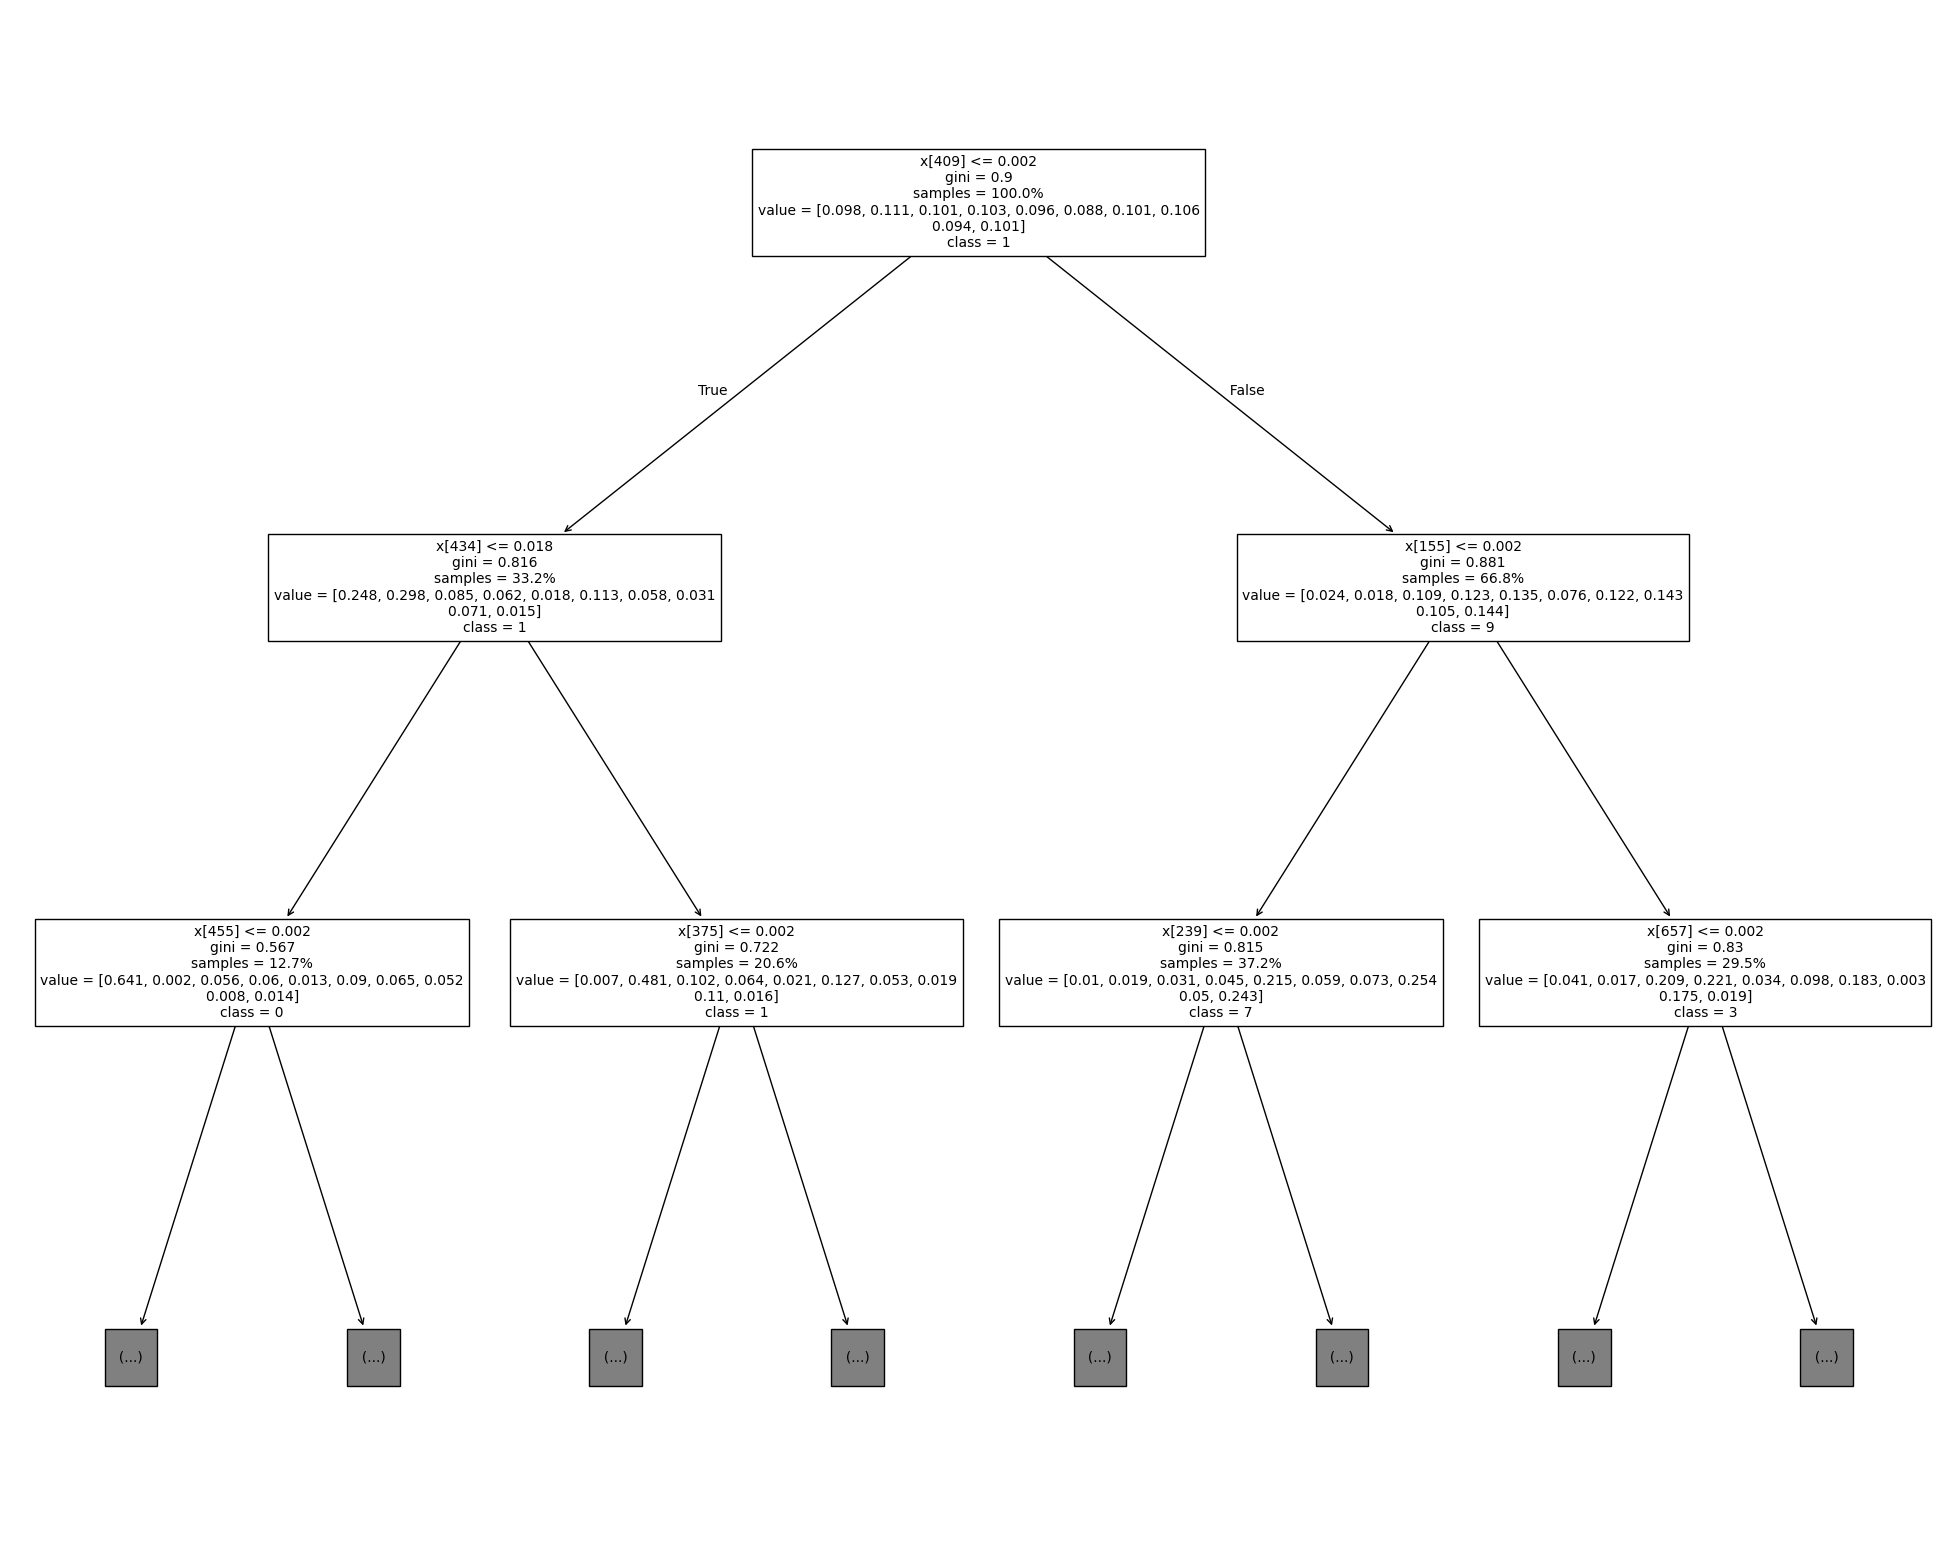

In [ ]:
# plotto l'albero decisionale iniziando importando la libreria apposita
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(dt_class, max_depth=2, proportion=True, fontsize=10, class_names=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])

### Support Vector Machine

* È un insieme di modelli utilizzati per risolvere problemi sia di regressione che di classificazione. A seconda del kernel, i modelli SVM possono essere sia lineari che non lineari.
* I modelli SVM lineari sono i più veloci da allenare e vengono usati quando i dati di training sono già linearmente separabili. L'obiettivo è quello di trovare l'iperpiano migliore che possa massimizzare il più possibile l'accuratezza nella predizione.
* Prendiamo come esempio un compito di classificazione binaria. L'SVM lineare è chiamato a trovare l'iperpiano con il margine di separazione più grande possibile per dividere due classi. Più i dati si discostano dall'iperpiano, più sicura sarà la classificazione. Di contro, minore sarà la distanza dei dati dall'iperpiano, più incerta sarà la classificazione.
* I modelli SVM non lineari vengono usati quando i dati non sono linearmente separabili. In questo caso, i dati di training vengono mappati su un nuovo spazio a n-dimensioni dove la separazione lineare diventa possibile. Sono modelli molto più lenti da allenare rispetto a quelli lineari, proprio a causa della ricerca e della trasformazione dei dati in un nuovo spazio multi-dimensionale.

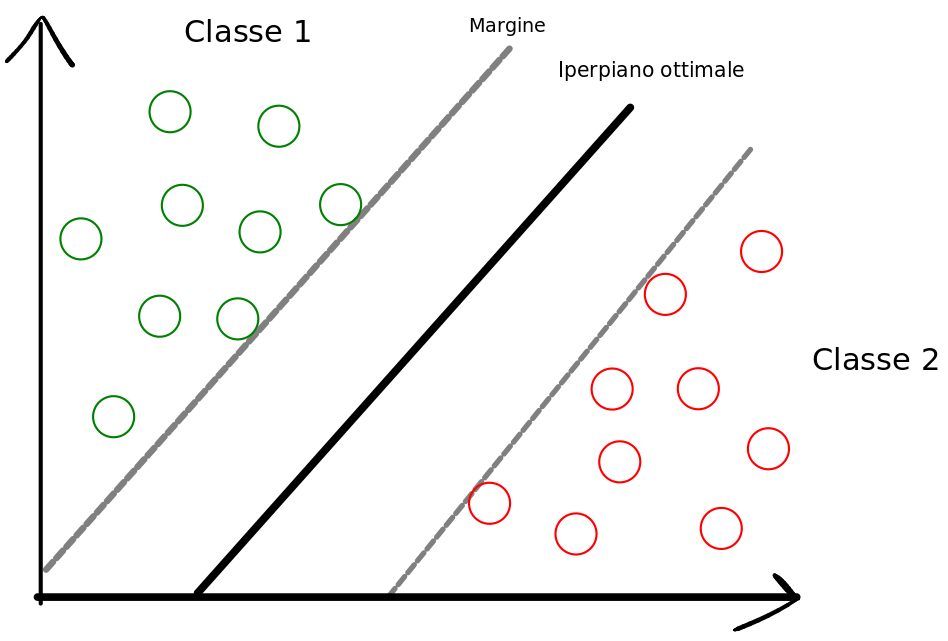

In [15]:
# Importo il modello
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# istanzio e alleno il modello
linsvc_class = LinearSVC().fit(X_train_sc, y_train)

# faccio la mia previsione
y_pred_lsvc = linsvc_class.predict(X_train_sc)

print(f"Cross Validation Score: {np.mean(cross_val_score(linsvc_class, X_train_sc, y_train, cv=5))}")

Cross Validation Score: 0.893


### Random Forest ed Ensemble Learning

* Quando i singoli modelli di Machine Learning non sono sufficienti per ottenere una buona acccuratezza o ci troviamo di fronte a situazioni di overfitting sui dati di training, si utilizzano tecniche di Ensamble Learning (apprendimento d'insieme).
* Qui "l'unione fa la forza". Si cerca di aumentare la potenza computazionale sfruttando ogni piccola intuizione, anche se poco accurata, che si otteniene interrogando ogni singolo modello.
* Con questa tecnica viene creato un grande e unico meta-modello, composto da tanti singoli modelli di Machine Learning. La decisione finale viene comunemente presa calcolando, in caso di regressione, calcolando la media delle risposte ai singoli modelli, mentre nel caso della classificazione a andando scegliere la classe più votata dai singoli modelli.
* Un esempio di Ensamble Learning è il Random Forest, un meta-modello composto da n Decision Tree.
* A differenza dei singoli modelli di Decision Tree, questo meta-modello introduce magiore variabilità e casualità, utile per combattere l'overfitting e generalizzare maggiormente a nuovi dati. Infati ogni singolo Decision Tree che compone il Random Forest non vede tutte le feature insieme per prendere una decisione (come farebbe di solito), ma una selezione casuale. Ogni singolo Decision Tree vedrà quindi un sotto-insieme di feature differenti.

In [16]:
# Importo il modello
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# istanzio e alleno il modello
rf_class = RandomForestClassifier(random_state=42).fit(X_train_sc, y_train)

# faccio la mia previsione
y_pred_rf = rf_class.predict(X_train_sc)

print(f"Cross Validation Score: {np.mean(cross_val_score(rf_class, X_train_sc, y_train, cv=5))}")

Cross Validation Score: 0.9530625


### Valutazione dei due modelli migliori sui dati di test

In [17]:
# Il KNN (0.953) e il Random Forest (0.954) con parametri di default sono i modelli con la migliore accuratezza media calcolata attraverso la tecnica della k-fold cross validation
# vediamo come si comportano sul test set

# importo una funzione di sklearn che mi fa ottenere un report completo delle misure di performance dei modelli
from sklearn.metrics import classification_report

mnist_labels = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# valuto il knn
knn_rep_train = classification_report(y_train, y_pred_knn, labels=mnist_labels)
y_pred_knn_test = knn_class.predict(X_test)
knn_rep_test = classification_report(y_test, y_pred_knn_test, labels=mnist_labels)

# valuto il random forest
rf_rep_train = classification_report(y_train, y_pred_rf, labels=mnist_labels)
y_pred_rf_test = rf_class.predict(X_test)
rf_rep_test = classification_report(y_test, y_pred_rf_test, labels=mnist_labels)

# stampo tutti i risultati (per l'accuratezza globale del modello guardare al dato di micro-avg)
print(f"""
KNN TRAIN

{knn_rep_train}

KNN TEST

{knn_rep_test}

RF TRAIN

{rf_rep_train}

RF TEST

{rf_rep_test}

""")


KNN TRAIN

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1574
           1       0.95      1.00      0.97      1778
           2       0.99      0.96      0.97      1619
           3       0.97      0.97      0.97      1644
           4       0.98      0.97      0.97      1540
           5       0.97      0.97      0.97      1413
           6       0.99      0.99      0.99      1612
           7       0.97      0.97      0.97      1698
           8       0.99      0.93      0.96      1503
           9       0.96      0.96      0.96      1619

   micro avg       0.97      0.97      0.97     16000
   macro avg       0.97      0.97      0.97     16000
weighted avg       0.97      0.97      0.97     16000


KNN TEST

              precision    recall  f1-score   support

           0       0.47      1.00      0.64       388
           1       1.00      0.89      0.94       465
           2       0.91      0.83      0.87       370
 

## Principali Algoritmi di Machine Learning Non Supervisionati

### K-Means

* Questo algoritmo attraverso x di iterazioni raggruppa gli esempi del train set in k cluster, separando i dati attraverso l'utilizzo, comunemente, della distanza euclidea. Il suo parametro principale è k, che deve essere impostato preliminarmente da noi.
* Ad ogni cluster k verrà assegnato un centroide. Le coordinate di questo centroide, prima dell'inizio del training, vengono impostate casualmente dall'algoritmo.
* In seguito a successive iterazioni, ogni esempio del train set viene assegnato al centroide che tramite distanza euclidea si trova più vicino a lui. Viene calcolato un punteggio di variabilità intra-cluster e aggiornate di conseguenza le coordinate dei centroidi fino a convergenza (quando le coordinate dei centroidi non cambiano più).
* Il numero di cluster migliori da impostare per ogni dataset può essere misurato attraverso il punteggio di inerzia e silhouette.
* Prendiamo il Silhouette Score come esempio. Esso valuta quanto ogni esempio assomigli agli esempi che fanno parte dello stesso cluster (indice di coesione), confrontando questo punteggio con ciò che si osserva negli esempi degli altri cluster (indice di separazione). Un punteggio più alto di Silhouette indica il valore k ottimale per separare quello specifico dataset.

In [18]:
# Importo il modello
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# istanzio e alleno il modello
kmeans_class_10 = KMeans(n_clusters=10, random_state=42).fit(X_train_sc)
kmeans_class_2 = KMeans(n_clusters=2, random_state=42).fit(X_train_sc)

# faccio la mia previsione
y_pred_kmeans_10 = kmeans_class_10.labels_
y_pred_kmeans_2 = kmeans_class_2.labels_

# valuto il numero migliore di k
print(f"Silhouette Score con 2 Classi: {silhouette_score(X_train_sc, y_pred_kmeans_2)}")
print(f"Silhouette Score con 10 Classi: {silhouette_score(X_train_sc, y_pred_kmeans_10)}")

# secondo me 2 è il miglior parametro k perché la separazione più evidente in questo dataset può essere fatta separando le aree "bianche" da quelle "nere" per ogni numero scritto.
# questa differenza salta maggiormente all'occhio rispetto alla forma dei numeri.

Silhouette Score con 2 Classi: 0.08689677836169082
Silhouette Score con 10 Classi: 0.05877001393135017


## Obiettivi, problematiche e possibili soluzioni

### Gli obiettivi del Machine Learning

* L'obiettivo di ogni algoritmo di Machine Learning è "**generalizzare**", quindi estendere la sua potenza predittiva a dati che il modello non ha mai visto durante l'addestramento.
* Per farlo, noi ottimizziamo gli **iperparametri**, mentre durante l'allenamento il modello ottimizza autonomamente i suoi **parametri** allenandosi e ottenendo la migliore performance possibile sui dati di training.
* Gli **iperparametri** sono tutte le impostazioni che possiamo decidere a priori, quindi prima dell'allenamento, come l'architettura di un modello di Deep Learning
* I **parametri** sono i valori numerici di cui è composto un modello che gli permettono di trasformare i dati in entrata per fare una previsione, come i pesi di una rete neurale.
* Esiste quindi un "trade-off", un equilibrio da trovare, tra la generalizzazione e l'ottimizzazione.
* Un modello troppo "ottimizzato" sui dati di training e che quindi non generalizza su dati mai visti si dice che è andato in **overfitting**.
* Un modello poco "ottimizzato" sui dati di training che performa meglio su dati mai visti si dice che è andato invece in **underfitting**.

### Alcune fonti di overfitting

* **Il tempo di allenamento:** con il passare del tempo dedicato al training (specificamente nel Deep Learning) si arriva a un punto in cui il modello va in overfitting sui dati di training. Si pensi a uno studente che anche dopo aver studiato molto bene sui libri per un esame, continua a leggere gli stessi libri ancora per molto tempo, quasi imparando a memoria ogni frase scritta all'interno.
* **La numerosità dei dati di training**: quando gli esempi sono pochi è molto più probabile per un modello andare in overfitting perché ci sono meno occasioni di apprendimento.
* **La qualità del dataset**: non sempre tutti i dati a nostra disposizione sono validi e annotati correttamente. In presenza di dati sbagliati o "sballati" (outliers) il modello apprende associazioni non corrette che possono portare ad errori e a non generalizzare su dati nuovi.
* **Le caratteristiche delle feature**: in alcuni casi possono essere presenti nei dati di training alcune **feature "ambigue"**, cioè che possono essere associate a più di una categoria. A volte i modelli, imparando troppo dai dati di training e prendendoli "troppo alla lettera", possono prendere decisioni certe sottostimando queste ambiguità. Questo fenomeno si trova anche in presenza di feature che sarebbero neutre nella sostanza, ma che hanno una leggera differenza (non statisticamente significativa) che li associa ad una variabile target rispetto ad un'altra.
* **La "grandezza" del modello**: modelli complessi e con ampia potenza computazionale possono imparare facilmente ogni dettaglio del train set in presenza di problemi "semplici" per loro (es. pochi dati, poche feature/dimensioni). Di contro, modelli troppo semplici di fronte a dataset "complessi" non sono in grado di imparare abbastanza.

## Valutare la bontà dei modelli di Machine Learning

### Problemi di Regressione

* **R2**: Porzione di varianza della variabile target che può essere spiegata e predetta dalle features. In altre parole, questa misura indica quando il modello si adatta ai dati. Può andare da 0 (il modello non spiega alcuna variabilità) a 1 (il modello "fitta" perfettamente i dati)
* **ROOT MEAN SQUARE ERROR (RMSE)**: La misura più utiilizzata per valutare la performance in problemi di regressione, rappresentando quindi la quantità di errore che esprime un modello (Euclidean Norm - L2). Si tratta della radice quadrata della media della distanza euclidea tra la previsione del modello e il valore reale elevato al quadrato. Elevando al quadrato gli errori, si penalizzano maggiormente quelli più grandi, il che rende tale misura molto sesibile agli outliers.
* **MEAN ABSOLUTE ERROR (MAE)**: Anche questa è una misura utile per valutare la performance di un modello di regressione (Manhattan Norm - L1). Si tratta della media della distanza assoluta (in valore assoluto) tra la previsione del modello e il valore reale. Ogni errore contribuisce in modo lineare alla media finale. Questa caratteristica rende tale misura meno sensibile agli outliers, quindi da preferire nel caso in cui il dataset abbia molti valori anomali.

### Problemi di Classificazione

* **CONFUSION MATRIX**: Raccoglie il numero di predizioni classificate dal modello come veramente corrette o meno. Abbiamo quindi una misura della frequenza dei veri e dei falsi positivi e negativi che il modello dimostra. Ogni riga della matrice rappresenta la classe reale, mentre ogni colonna la classe predetta.

* **PRECISION**: Quanto il modello è accurato nel predire una certa classe. In altre parole, tutte volte che il modello mi dice che la classe corretta è 0, quante volte ci azzecca veramente?
Il problema di questa misura è che il modello potrebbe anche ignorare la maggior parte degli esempi con la classe 0 nel dataset mantenendo però il 100% dell'accuratezza (es. se nel dataset ci sono 10 esempi totali da classificare come "0", ma il modello richiama la classe 0 nella sua predizione una sola volta e lo fa correttamente, quindi fa 1/1 = 100% di precision...ma gli altri 9 che ha ignorato??).

$$f(x) = \frac{True Positives}{True Positives + False Positives}$$

* **RECALL**: Chiamata anche "sensitivity", mostra ciò che la precision non misura, cioè quante volte viene richiamata dal modello la classe corretta sul totale delle volte in cui dovrebbe essere richiamata.

$$f(x) = \frac{True Positives}{True Positives + False Negatives}$$

* **F1 SCORE**: È la media armonica che combina precision e recall in un unico puinteggio. Questo calcolo da maggiore peso al punteggio ai valori più bassi.

**L'importanza relativa della precision e del recall dipende dal problema esaminato**. Ad esempio, nello screening medico è molto importante avere un alto recall, quindi identificare la possibile presenza di una patologia anche a discapito della precisione. Meglio avere dei falsi positivi in più che ignorare erroneamente la possibile presenza di una patologia che poi verrà approfondita ulteriormente in fase diagnostica avanzata. In fase di diagnosi invece, potrebbe essere più importante la precision rispetto al recall. In questo caso è auspicabile una previsione corretta riducendo al minimo i falsi positivi per non "nuocere" al paziente con cure sbagliate.

### Esempio di codice

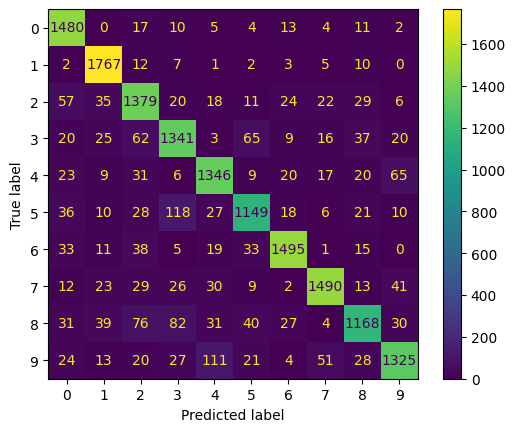

In [ ]:
# importo le librerie necessarie alla valutazione
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# instanzio e alleno i modello sui dati di training
rf_class = RandomForestClassifier(n_estimators=5, random_state=42).fit(X_train_sc, y_train)

# effettuo una cross-validation che mi da in output le previsioni
y_pred_train = cross_val_predict(rf_class, X_train_sc, y_train, cv=3)

# creo una matrice di confusione sulle performance modello
conf_matr = confusion_matrix(y_train, y_pred_train, labels=rf_class.classes_)

# plotto i risultati della matrice di confusione
cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_matr, display_labels=rf_class.classes_)
cm_display.plot()
plt.show()

Commento alla matrice di confusione, prendendo in considerazione il valore 0 come classe positiva
rispetto al valore 1 come classe negativa. Dimentichiamo le altre classi, per semplicità:

* Veri positivi: 1480
* Veri negativi: 1767
* Falsi positivi: 2
* Falsi negativi: 0

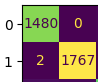

In [ ]:
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score

"""
Precision per la classe 0:
True Positives: 1480
False Positives: 2 + 57 + 20 + 23 + 36 + 33 + 12 + 31 + 24 = 238
1488 / (1488 + 228) = 0.86

Recall per la classe 0:
True Positives: 1480
False Negatives: 0 + 17 + 10 + 5 + 4 + 13 + 4 + 11 + 2 = 66
1488 / (1488 + 66) = 0.96
"""
print("Precision score: ", precision_score(y_train, y_pred_train, labels=[0], average="micro"))
print("Recall score: ", recall_score(y_train, y_pred_train, labels=[0], average="micro"))
print("F1 score: ", f1_score(y_train, y_pred_train, labels=[0], average="micro"))

Precision score:  0.8614668218859138
Recall score:  0.9573091849935317
F1 score:  0.9068627450980392


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1546
           1       0.91      0.98      0.94      1809
           2       0.82      0.86      0.84      1601
           3       0.82      0.84      0.83      1598
           4       0.85      0.87      0.86      1546
           5       0.86      0.81      0.83      1423
           6       0.93      0.91      0.92      1650
           7       0.92      0.89      0.91      1675
           8       0.86      0.76      0.81      1528
           9       0.88      0.82      0.85      1624

    accuracy                           0.87     16000
   macro avg       0.87      0.87      0.87     16000
weighted avg       0.87      0.87      0.87     16000

